Run this script to compute or plot potential energy surface color-coded for photonic/excitonic contribution for different cavity parameters.

In [23]:
### Import all libraries and define various parameters here!
import numpy as np
from polaritonic import polaritonic
from numpy import linalg as LA
import math
from matplotlib import pyplot as plt
from matplotlib import cm
from matplotlib import rcParams
from scipy.interpolate import InterpolatedUnivariateSpline


rcParams['font.family'] = 'serif'
rcParams['font.size'] = 14

The following cell will actually compute the derivative coupling and write it to a file.  
You can change the $\gamma$ parameter (via the `gamp=X` line) and the filename (via `prefix = Y` line) here!

In [2]:
ri_init = -0.66156
vi_init = 3.3375e-5
'''NOTE 1:  when you change gamp, you change the lifetime in Hamiltonian!'''
### lifetime
gamp = 0.1
gam_diss_np = gamp * 1e-3 / 27.211

### photonic mode energy in eV
omp = 2.45
### convert to a.u.
omc = omp/27.211
### coupling strength in eV
gp = 0.02
gc = gp/27.211

au_to_ps = 2.4188e-17 * 1e12

### get prefix for data file names
'''NOTE 2:  when you prefix, it will change the file name that the data is written to, and in the next cell that 
   plots the data, this file name will automatically be read from.  Make sure you change the prefix accordingly each 
   time you change the gamp parameter.'''
prefix = "gam_0.1"
### filename to wrote PES to
pes_fn = "Data/" + prefix + '_pes.txt'
### filename to write photonic contributions of each state to
pc_fn = "Data/" + prefix + '_photon_contribution.txt'

### hellman-Feynman file 
hf_fn = "Data/" + prefix + "_hf.txt"
dc_fn = "Data/" + prefix + "_dc.txt"
ip_fn = "Data/" + prefix + "_ip.txt"
### perturbative approimation to dc data
ptdc_fn = "Data/" + prefix + "_ptdc.txt"
filename = prefix + ".eps"

options = {
        'Number_of_Photons': 1,
        'Complex_Frequency': True,
        'Photon_Energys': [omc],
        'Coupling_Strengths': [gc], 
        'Photon_Lifetimes': [gam_diss_np],
        'Initial_Position': ri_init,
        'Initial_Velocity': vi_init,
        'Mass': 1009883,
        ### temperature in a.u.
        'Temperature': 0.00095,
        ### friction in a.u.
        'Friction': 0.000011,
        ### specify initial state as a human would, not a computer...
        ### i.e. 1 is the ground state... it will be shifted down by -1 so
        ### that it makes sense to the python index convention
        'Initial_Local_State': 3
        
        }

### instantiate
polt = polaritonic(options)
### write forces and derivative coupling
#polt.Transform_L_to_P()



Initialize R, find local slope and curvature of each surface, then compute the global surfaces with 
correct ordering and write them to data files.

In [3]:
### initialize near the lhs of the PESs
polt.R = -1.25
### get local slope curvature of each surface at R = -1.25
polt.init_slope_and_curve()
### write the potential energy surfaces, the derivative couplings, and the polaritonic inner-product and left/right
### eigenvector data to files
polt.Write_PES(pes_fn, pc_fn, dc_fn, ptdc_fn, ip_fn)

1

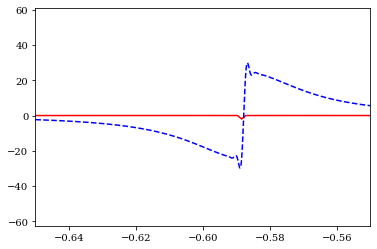

3.53210339179641e-05


In [4]:
### finite difference
dc = np.loadtxt(dc_fn,dtype=complex)
### perturbative
ptdc = np.loadtxt(ptdc_fn,dtype=complex)


spline_axis = np.real(dc[:,0])
eval_spline = np.linspace(-1.5, 1.5, 50000)

re_dc_23_spline = InterpolatedUnivariateSpline(spline_axis, np.real(dc[:,1]), k=3)
im_dc_23_spline = InterpolatedUnivariateSpline(spline_axis, np.imag(dc[:,1]), k=3)

re_dc_32_spline = InterpolatedUnivariateSpline(spline_axis, np.real(dc[:,2]), k=3)
im_dc_32_spline = InterpolatedUnivariateSpline(spline_axis, np.imag(dc[:,2]), k=3)


pt_re_dc_23_spline = InterpolatedUnivariateSpline(spline_axis, np.real(ptdc[:,1]), k=3)
pt_im_dc_23_spline = InterpolatedUnivariateSpline(spline_axis, np.imag(ptdc[:,1]), k=3)

pt_re_dc_32_spline = InterpolatedUnivariateSpline(spline_axis, np.real(ptdc[:,2]), k=3)
pt_im_dc_32_spline = InterpolatedUnivariateSpline(spline_axis, np.imag(ptdc[:,2]), k=3)

plt.plot(spline_axis, im_dc_32_spline(spline_axis), 'red')
plt.plot(eval_spline, re_dc_32_spline(eval_spline), 'b--')
plt.xlim(-0.65,-0.55)
plt.show()
polt.Initialize_Phase_Space()
print(polt.V)



Once the derivative coupling has been written to a file (or several have been written to a file), you can parse the files and plot them with the following cell!

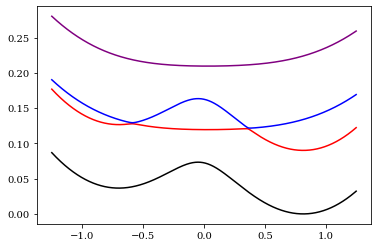

In [5]:
pes_v = np.loadtxt(pes_fn, dtype=complex)
spline_axis = np.real(pes_v[:,0])
pc_v = np.loadtxt(pc_fn,dtype=complex)
 
# g0
re_g0_spline = InterpolatedUnivariateSpline(spline_axis, np.real(pes_v[:,1]), k=3)
im_g0_spline = InterpolatedUnivariateSpline(spline_axis, np.imag(pes_v[:,1]), k=3)

# LP
re_LP_spline = InterpolatedUnivariateSpline(spline_axis, np.real(pes_v[:,2]), k=3)
im_LP_spline = InterpolatedUnivariateSpline(spline_axis, np.imag(pes_v[:,2]), k=3)

# UP
re_UP_spline = InterpolatedUnivariateSpline(spline_axis, np.real(pes_v[:,3]), k=3)
im_UP_spline = InterpolatedUnivariateSpline(spline_axis, np.imag(pes_v[:,3]), k=3)

# e1
re_e1_spline = InterpolatedUnivariateSpline(spline_axis, np.real(pes_v[:,4]), k=3)
im_e1_spline = InterpolatedUnivariateSpline(spline_axis, np.imag(pes_v[:,4]), k=3)


plt.plot(spline_axis, re_g0_spline(spline_axis), 'black')
plt.plot(spline_axis, re_LP_spline(spline_axis), 'red')
plt.plot(spline_axis, re_UP_spline(spline_axis), 'blue')
plt.plot(spline_axis, re_e1_spline(spline_axis), 'purple')
plt.show()

#plt.plot(pes_v[:,0], 27.211*np.real(pes_v[:,2]), 'blue')
#plt.plot(pes_v[:,0], np.imag(pes_v[:,2]), 'b*')
#plt.plot(pes_v[:,0], np.imag(pes_v[:,3]), 'r*')
#plt.plot(pes_v[:,0], 27.211*np.real(pes_v[:,3]), 'red')
#plt.xlim(-0.7,-0.5)
#plt.ylim(3.2, 4.02)
#plt.show()






In [6]:
ci=0+1j
polt.R = -0.6
polt.V = 3e-5
H_pl = np.zeros((4,4),dtype=complex)
dc_pl = np.zeros((4,4),dtype=complex)
dc_pl[1,2] = re_dc_23_spline(polt.R) + im_dc_23_spline(polt.R)*ci
dc_pl[2,1] = re_dc_32_spline(polt.R) + im_dc_32_spline(polt.R)*ci

print("dc matrix")
print(dc_pl)

H_pl[0,0] = re_g0_spline(polt.R)+ci*im_g0_spline(polt.R)
H_pl[1,1] = re_LP_spline(polt.R)+ci*im_LP_spline(polt.R)
H_pl[2,2] = re_UP_spline(polt.R)+ci*im_UP_spline(polt.R)
H_pl[3,3] = re_e1_spline(polt.R)+ci*im_e1_spline(polt.R)
print("Hpl")
print(H_pl)

dc matrix
[[  0.        +0.j           0.        +0.j
    0.        +0.j           0.        +0.j        ]
 [  0.        +0.j           0.        +0.j
   17.76410762-0.01910123j   0.        +0.j        ]
 [  0.        +0.j         -17.76394421+0.01910767j
    0.        +0.j           0.        +0.j        ]
 [  0.        +0.j           0.        +0.j
    0.        +0.j           0.        +0.j        ]]
Hpl
[[0.03810848-3.03331412e-11j 0.        +0.00000000e+00j
  0.        +0.00000000e+00j 0.        +0.00000000e+00j]
 [0.        +0.00000000e+00j 0.1277174 -1.36702532e-06j
  0.        +0.00000000e+00j 0.        +0.00000000e+00j]
 [0.        +0.00000000e+00j 0.        +0.00000000e+00j
  0.12940147-4.70466868e-07j 0.        +0.00000000e+00j]
 [0.        +0.00000000e+00j 0.        +0.00000000e+00j
  0.        +0.00000000e+00j 0.21901039-1.83746186e-06j]]


In [7]:
dc_100 = np.array([[ 0.         +0j,          0.         +0j,
   0.         +0j,          0.         +0j        ],
 [ 0.         +0j,          0.         +0j,
  -3.27738564-10.44331395j,  0.         +0j        ],
 [ 0.         +0j,          3.27738564+10.44331395j,
   0.         +0j,          0.         +0j        ],
 [ 0.         +0j,          0.         +0j,
   0.         +0j,          0.         +0j        ]])

hpl_100 = np.array([[0.03810848-3.03300121e-08j, 0.        +0.00000000e+00j,
  0.        +0.00000000e+00j, 0.        +0.00000000e+00j],
 [0.        +0.00000000e+00j, 0.12799737-1.59031032e-03j,
  0.        +0.00000000e+00j, 0.        +0.00000000e+00j],
 [0.        +0.00000000e+00j, 0.        +0.00000000e+00j,
  0.1291215 -2.47181867e-04j, 0.        +0.00000000e+00j],
 [0.        +0.00000000e+00j, 0.        +0.00000000e+00j,
  0.        +0.00000000e+00j, 0.21901039-1.83746186e-03j]])

dc_10 = np.array([[  0.        +0.j,           0.        +0.j,
    0.        +0.j,           0.        +0.j        ],
 [  0.        +0.j,           0.        +0.j,
   17.08996596-1.87708067j,   0.        +0.j        ],
 [  0.        +0.j,         -17.05045674+1.93695532j,
    0.        +0.j,           0.        +0.j        ],
 [  0.        +0.j,           0.        +0.j,
    0.        +0.j,           0.        +0.j        ]])


hpl_10 = np.array([[0.03810848-3.03331099e-09j, 0.        +0.00000000e+00j,
  0.        +0.00000000e+00j, 0.        +0.00000000e+00j],
 [0.        +0.00000000e+00j, 0.12772122-1.36906565e-04j,
  0.        +0.00000000e+00j, 0.        +0.00000000e+00j],
 [0.        +0.00000000e+00j, 0.        +0.00000000e+00j,
  0.12939765-4.68426544e-05j, 0.        +0.00000000e+00j],
 [0.        +0.00000000e+00j, 0.        +0.00000000e+00j,
  0.        +0.00000000e+00j, 0.21901039-1.83746186e-04j]])

dc_0p1 = np.array([[  0.        +0.j,           0.        +0.j,
    0.        +0.j,           0.        +0.j        ],
 [  0.        +0.j,           0.        +0.j,
   17.76410762-0.01910123j,   0.        +0.j        ],
 [  0.        +0.j,         -17.76394421+0.01910767j,
    0.        +0.j,           0.        +0.j        ],
 [  0.        +0.j,           0.        +0.j,
    0.        +0.j,           0.        +0.j        ]])

hpl_0p1 = np.array([[0.03810848-3.03331412e-11j, 0.        +0.00000000e+00j,
  0.        +0.00000000e+00j, 0.        +0.00000000e+00j],
 [0.        +0.00000000e+00j, 0.1277174 -1.36702532e-06j,
  0.        +0.00000000e+00j, 0.        +0.00000000e+00j],
 [0.        +0.00000000e+00j, 0.        +0.00000000e+00j,
  0.12940147-4.70466868e-07j, 0.        +0.00000000e+00j],
 [0.        +0.00000000e+00j, 0.        +0.00000000e+00j,
  0.        +0.00000000e+00j, 0.21901039-1.83746186e-06j]])

dc_0 = np.array([[  0.        +0.j,   0.        +0.j,   0.        +0.j,   0.        +0.j],
 [  0.        +0.j,   0.        +0.j,  17.29758891+0.j,   0.        +0.j],
 [  0.        +0.j, -17.26585532+0.j,   0.        +0.j,   0.        +0.j],
 [  0.        +0.j,   0.        +0.j,   0.        +0.j,   0.        +0.j]])

hpl_0 = np.array([[0.03810848+0.j, 0.        +0.j, 0.        +0.j, 0.        +0.j],
 [0.        +0.j, 0.1277174 +0.j, 0.        +0.j, 0.        +0.j],
 [0.        +0.j, 0.        +0.j, 0.12940147+0.j, 0.        +0.j],
 [0.        +0.j, 0.        +0.j, 0.        +0.j, 0.21901039+0.j]])

dc matrix
[[ 0.         +0.j          0.         +0.j
   0.         +0.j          0.         +0.j        ]
 [ 0.         +0.j          0.         +0.j
  -3.27738564-10.44331395j  0.         +0.j        ]
 [ 0.         +0.j          3.27738564+10.44331395j
   0.         +0.j          0.         +0.j        ]
 [ 0.         +0.j          0.         +0.j
   0.         +0.j          0.         +0.j        ]]
ham matrix
[[0.03810848-3.03300121e-08j 0.        +0.00000000e+00j
  0.        +0.00000000e+00j 0.        +0.00000000e+00j]
 [0.        +0.00000000e+00j 0.12799737-1.59031032e-03j
  0.        +0.00000000e+00j 0.        +0.00000000e+00j]
 [0.        +0.00000000e+00j 0.        +0.00000000e+00j
  0.1291215 -2.47181867e-04j 0.        +0.00000000e+00j]
 [0.        +0.00000000e+00j 0.        +0.00000000e+00j
  0.        +0.00000000e+00j 0.21901039-1.83746186e-03j]]
initial wavefunction
[0.2236068+0.j 0.2236068+0.j 0.9486833+0.j 0.       +0.j]


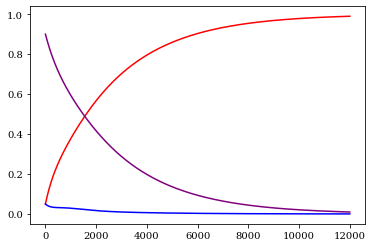

In [11]:
### initialize stuff
ci=0+1j
polt.R = -0.6
polt.V = 3e-5
n_time = 100000
polt.C_polariton = np.array([np.sqrt(0.5/10)+0.j, np.sqrt(0.5/10)+0.j, np.sqrt(9/10)+0.j, 0.+0.j])
t_array = np.zeros(n_time)
pop = np.zeros((3,n_time))

### set status for no, medium, or high dissipation
diss_status = "high"


if diss_status=="no":
    polt.H_polariton = np.copy(hpl_0)
    polt.dc = np.copy(dc_0)
    
elif diss_status=="low":
    polt.H_polariton = np.copy(hpl_0p1)
    polt.dc = np.copy(dc_0p1)
elif diss_status=="medium":
    polt.H_polariton = np.copy(hpl_10)
    polt.dc = np.copy(dc_10)
elif diss_status=="high":
    polt.H_polariton = np.copy(hpl_100)
    polt.dc = np.copy(dc_100)
### default is no
else:
    polt.H_polariton = np.copy(hpl_0)
    polt.dc = np.copy(dc_0)

print("dc matrix")
print(polt.dc)


print("ham matrix")
print(polt.H_polariton)

print("initial wavefunction")
print(polt.C_polariton)

for i in range(0,n_time):
    t_array[i] = i*polt.dt
    polt.RK4_NH_SE()
    #print("new pop LP ",i)
    pop[1,i] = np.real(np.conj(polt.C_polariton[1])*polt.C_polariton[1])
    #print("new pop UP ",i)
    pop[2,i] = np.real(np.conj(polt.C_polariton[2])*polt.C_polariton[2])
    pop[0,i] = 1 - pop[2,i] - pop[1,i]
    
    
plt.plot(t_array, pop[0,:], 'red')
plt.plot(t_array, pop[1,:], 'blue')
plt.plot(t_array, pop[2,:], 'purple')
plt.show()

if diss_status=="no":
    pop_nl = np.copy(pop)
elif diss_status=="low":
    pop_ll = np.copy(pop)
elif diss_status=="medium":
    pop_ml = np.copy(pop)
elif diss_status=="high":
    pop_hl = np.copy(pop)
### default is no
else:
    pop_nl = np.copy(pop)


/Users/jay/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:48: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


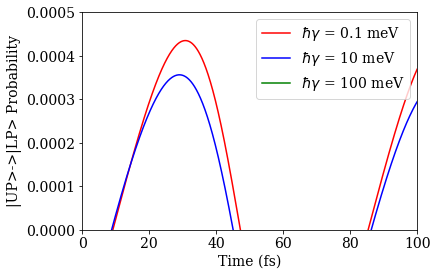

/Users/jay/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:60: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


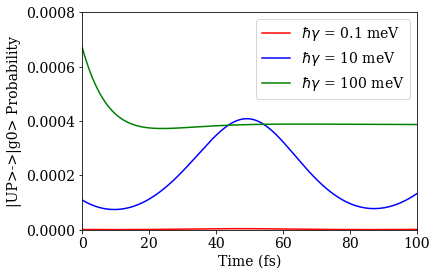

/Users/jay/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:72: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


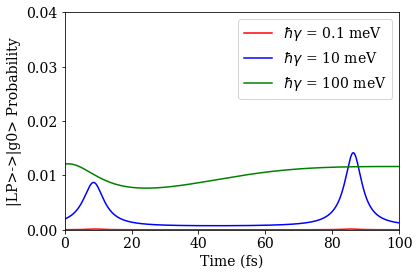

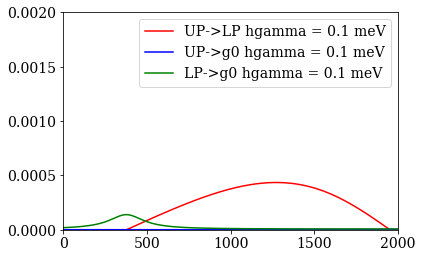

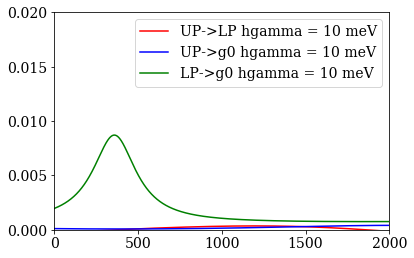

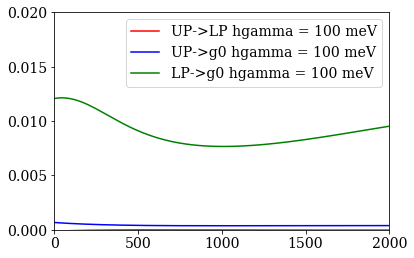

In [26]:
#t_array, pop[0,:]
g0_lo_loss = InterpolatedUnivariateSpline(t_array, pop_ll[0,:], k=3)
LP_lo_loss = InterpolatedUnivariateSpline(t_array, pop_ll[1,:], k=3)
UP_lo_loss = InterpolatedUnivariateSpline(t_array, pop_ll[2,:], k=3)

g0_med_loss = InterpolatedUnivariateSpline(t_array, pop_ml[0,:], k=3)
LP_med_loss = InterpolatedUnivariateSpline(t_array, pop_ml[1,:], k=3)
UP_med_loss = InterpolatedUnivariateSpline(t_array, pop_ml[2,:], k=3)

g0_hi_loss = InterpolatedUnivariateSpline(t_array, pop_hl[0,:], k=3)
LP_hi_loss = InterpolatedUnivariateSpline(t_array, pop_hl[1,:], k=3)
UP_hi_loss = InterpolatedUnivariateSpline(t_array, pop_hl[2,:], k=3)


g0_lo_loss_prime = g0_lo_loss.derivative()
g0_med_loss_prime = g0_med_loss.derivative()
g0_hi_loss_prime = g0_hi_loss.derivative()

UP_lo_loss_prime = UP_lo_loss.derivative()
UP_med_loss_prime = UP_med_loss.derivative()
UP_hi_loss_prime = UP_hi_loss.derivative()

LP_lo_loss_prime = LP_lo_loss.derivative()
LP_med_loss_prime = LP_med_loss.derivative()
LP_hi_loss_prime = LP_hi_loss.derivative()

P_UP_LP_lo_loss = LP_lo_loss_prime(t_array)/UP_lo_loss(t_array)
P_UP_LP_med_loss = LP_med_loss_prime(t_array)/UP_med_loss(t_array)
P_UP_LP_hi_loss = LP_hi_loss_prime(t_array)/UP_hi_loss(t_array)


P_UP_g0_lo_loss = g0_lo_loss_prime(t_array)/UP_lo_loss(t_array)
P_UP_g0_med_loss = g0_med_loss_prime(t_array)/UP_med_loss(t_array)
P_UP_g0_hi_loss = g0_hi_loss_prime(t_array)/UP_hi_loss(t_array)

P_LP_g0_lo_loss = g0_lo_loss_prime(t_array)/LP_lo_loss(t_array)
P_LP_g0_med_loss = g0_med_loss_prime(t_array)/LP_med_loss(t_array)
P_LP_g0_hi_loss = g0_hi_loss_prime(t_array)/LP_hi_loss(t_array)
tf = 2.4188e-17 * 1e15
plt.plot(t_array*tf, P_UP_LP_lo_loss, 'red',label='$\hbar \gamma$ = 0.1 meV' )
plt.plot(t_array*tf, P_UP_LP_med_loss, 'blue', label='$\hbar \gamma$ = 10 meV')
plt.plot(t_array*tf, P_UP_LP_hi_loss, 'green', label='$\hbar \gamma$ = 100 meV')
plt.ylabel("|UP>->|LP> Probability")
plt.xlabel("Time (fs)")
plt.ylim(0,0.0005)
plt.xlim(0,100)
plt.legend()
plt.savefig("UP_to_LP.eps")
plt.show()


plt.plot(t_array*tf, P_UP_g0_lo_loss, 'red', label='$\hbar \gamma$ = 0.1 meV')
plt.plot(t_array*tf, P_UP_g0_med_loss, 'blue', label='$\hbar \gamma$ = 10 meV')
plt.plot(t_array*tf, P_UP_g0_hi_loss, 'green', label='$\hbar \gamma$ = 100 meV')
plt.ylabel("|UP>->|g0> Probability")
plt.xlabel("Time (fs)")
plt.ylim(0,0.0008)
plt.xlim(0,100)
plt.legend()
plt.savefig("UP_to_g0.eps")
plt.show()


plt.plot(t_array*tf, P_LP_g0_lo_loss, 'red', label='$\hbar \gamma$ = 0.1 meV')
plt.plot(t_array*tf, P_LP_g0_med_loss, 'blue', label='$\hbar \gamma$ = 10 meV')
plt.plot(t_array*tf, P_LP_g0_hi_loss, 'green', label='$\hbar \gamma$ = 100 meV')
plt.ylabel("|LP>->|g0> Probability")
plt.xlabel("Time (fs)")
plt.ylim(0,0.04)
plt.xlim(0,100)
plt.legend()
plt.savefig("LP_to_g0.eps")
plt.show()


#plt.plot(t_array, P_LP_g0_no_loss, 'red')
#plt.plot(t_array, P_LP_g0_med_loss, 'blue')
#plt.plot(t_array, P_LP_g0_hi_loss, 'green')
#plt.xlim(100,12000)
#plt.ylim(-0.5,0.5)
#plt.show()


#plt.plot(t_array, P_UP_LP_no_loss, 'red')
#plt.plot(t_array, P_UP_g0_no_loss, 'blue')
#plt.plot(t_array, P_LP_g0_no_loss, 'green')
#plt.xlim(100,12000)
#plt.show()


plt.plot(t_array, P_UP_LP_lo_loss, 'red', label='UP->LP hgamma = 0.1 meV')
plt.plot(t_array, P_UP_g0_lo_loss, 'blue', label='UP->g0 hgamma = 0.1 meV')
plt.plot(t_array, P_LP_g0_lo_loss, 'green', label='LP->g0 hgamma = 0.1 meV')
plt.legend()
plt.ylim(0,0.002)
plt.xlim(0,2000)
plt.show()
plt.plot(t_array, P_UP_LP_med_loss, 'red', label='UP->LP hgamma = 10 meV')
plt.plot(t_array, P_UP_g0_med_loss, 'blue', label='UP->g0 hgamma = 10 meV')
plt.plot(t_array, P_LP_g0_med_loss, 'green', label='LP->g0 hgamma = 10 meV')
plt.legend()
plt.ylim(0,0.02)
plt.xlim(0,2000)
plt.show()

plt.plot(t_array, P_UP_LP_hi_loss, 'red', label='UP->LP hgamma = 100 meV')
plt.plot(t_array, P_UP_g0_hi_loss, 'blue', label='UP->g0 hgamma = 100 meV')
plt.plot(t_array, P_LP_g0_hi_loss, 'green', label='LP->g0 hgamma = 100 meV')
plt.legend()
plt.ylim(0,0.02)
plt.xlim(0,2000)
plt.show()